<a href="https://colab.research.google.com/github/mostafa-ja/NLP/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis

Let's discuss PCA! Since this isn't exactly a full machine learning algorithm, but instead an unsupervised learning algorithm, we will just have a lecture on this topic, but no full machine learning project (although we will walk through the cancer set with PCA).

## PCA Review



![](https://raw.githubusercontent.com/krishnaik06/Dimesnsionality-Reduction/67a479eaaac811803a7a00bf182062e888d3fd8b/PCA.png)

## Libraries

In [136]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## The Data

Let's work with the cancer data set again since it had so many features.

In [137]:
from sklearn.datasets import load_breast_cancer

In [138]:
cancer = load_breast_cancer()

In [139]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [140]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [141]:
print(cancer['data'].shape)
print(cancer['feature_names'].shape)

(569, 30)
(30,)


In [142]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [143]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [144]:
print(cancer.target_names)
print(np.unique(cancer.target,return_counts=True))

['malignant' 'benign']
(array([0, 1]), array([212, 357]))


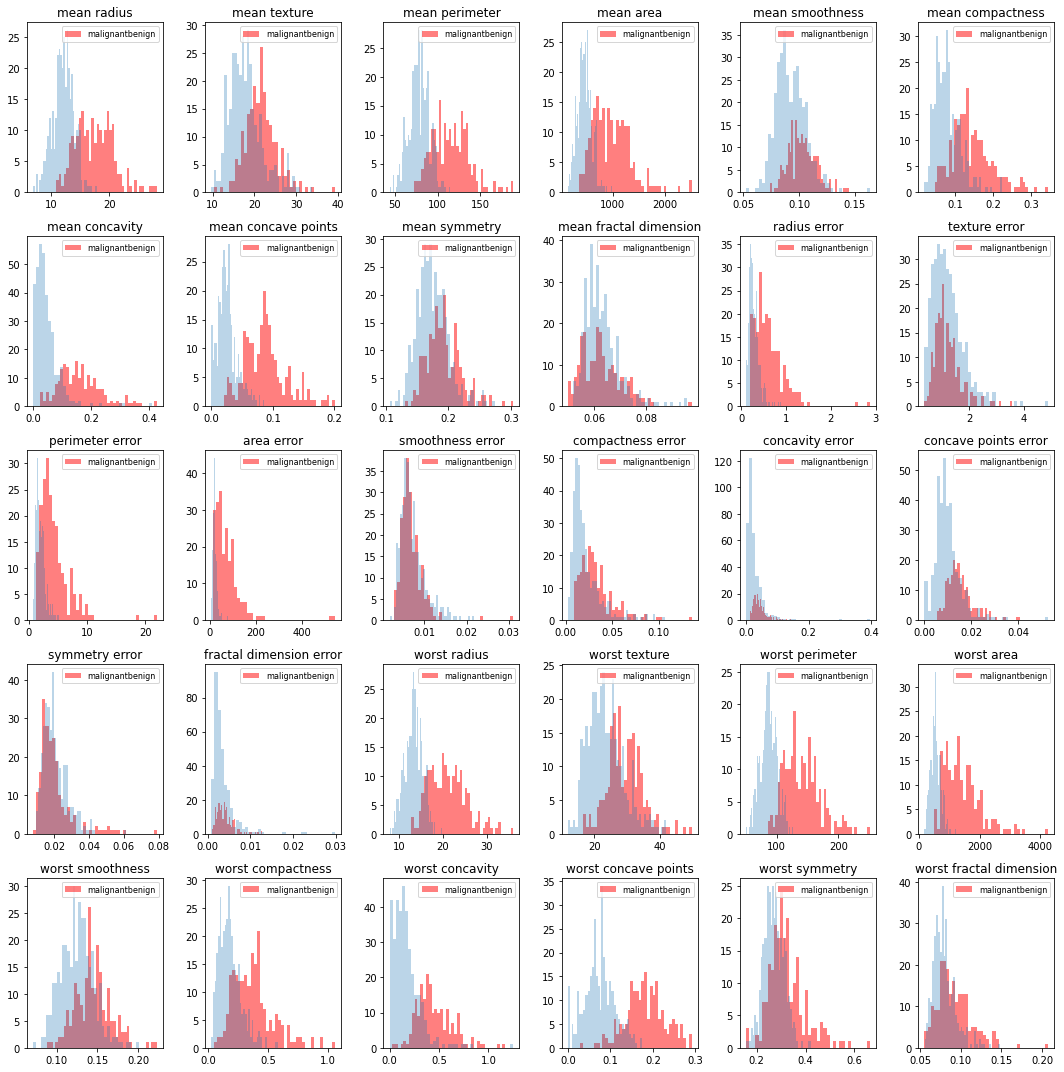

In [145]:
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

_,axes = plt.subplots(5,6,figsize=(15,15))
ax = axes.ravel()
# cancer['data'].shape[1]=30
for i in range(cancer['data'].shape[1]):

  ax[i].hist(malignant[:,i], bins=40,color='r', alpha=0.5) #alpha: for plotting two transparet plots together
  ax[i].hist(benign[:,i], bins=40, alpha=0.3)

  ax[i].set_title(cancer.feature_names[i], fontsize=12)

  ax[i].legend(['malignant' 'benign'], loc='best', fontsize=8)


plt.tight_layout() # automatically adjust subplot parameters to give specified padding, gives a proper space between subplots
plt.show()

For each feature, if two histograms are separate, this means that the feature is important and it directly affects the target (diagnosis). For example, if you look at the histogram for the mean radius feature, you will observe that the larger the tumour, the more likely that the tumor is malignant (red):

![](https://miro.medium.com/max/640/1*FYg_QMwQlGq83_ppBVtkKg.png)

On the other hand, the smoothness error feature doesn’t really tell you whether a tumor is malignant or benign:

![](https://miro.medium.com/max/640/1*G6QnP-2FcXOU_Adm4t2Jhw.png)

# Applying PCA with more details

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [148]:
scaled_data = scaler.transform(df)

The initializer of the PCA class has a parameter named n_components. You can supply it one of the following values:

**an integer** to indicate how many principal components you want to reduce the features to.


**a floating-point number between 0<n<1** and it will return the number of components needed to capture the specified percentage of variability in the data. For example, if you want to find the number of components needed to capture 85% of the variability of the data, pass 0.85 to the n_components parameter.


**None**. In this case, the number of components returned will be the same as the number of original features in the dataset

In [149]:
from sklearn.decomposition import PCA

components = None
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(scaled_data)

PCA()

In [150]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)


Variances (Percentage):
[4.42720256e+01 1.89711820e+01 9.39316326e+00 6.60213492e+00
 5.49576849e+00 4.02452204e+00 2.25073371e+00 1.58872380e+00
 1.38964937e+00 1.16897819e+00 9.79718988e-01 8.70537901e-01
 8.04524987e-01 5.23365745e-01 3.13783217e-01 2.66209337e-01
 1.97996793e-01 1.75395945e-01 1.64925306e-01 1.03864675e-01
 9.99096464e-02 9.14646751e-02 8.11361259e-02 6.01833567e-02
 5.16042379e-02 2.72587995e-02 2.30015463e-02 5.29779290e-03
 2.49601032e-03 4.43482743e-04]


So how do you interpret the above output? You can interpret it as follows:

The first component alone captures about 44% variability in the data
The second one captures about 19% variability in the data and so on.
The 30 components altogether capture 100% variability in the data.

A much easier way to understand the above result is to print the cumulative variances:

In [151]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum()*100)

Cumulative Variances (Percentage):
[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.96876117  99.99176271  99.99706051  99.99955652 100.        ]


You can now interpret the cumulative variances as follows:

The first component alone captures about 44% variability in the data

The first two components capture about 63% variability in the data and so on.

The first 8 components together capture about 92.6% variability in the data.

A visual way to view the cumulative variances is to plot a scree plot.

A scree plot is a line plot of the principal components.

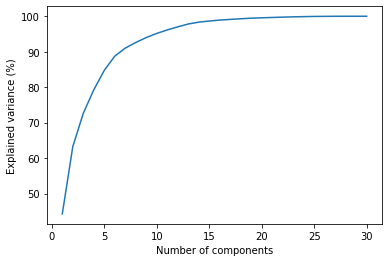

In [152]:
component = len(pca.explained_variance_ratio_) if components is None else components

plt.plot(range(1,component+1), pca.explained_variance_ratio_.cumsum()*100);
plt.xlabel('Number of components');
plt.ylabel('Explained variance (%)');

The scree plot makes it easy for you to visualize the number of components that are needed to capture the various amount of variability in the data:

Let’s now apply PCA to find the desired number of components based on the desired explained variance, say 85%:

Cumulative Variances (Percentage):
[44.27202561 63.24320765 72.63637091 79.23850582 84.73427432 88.75879636]
Number of components: 6


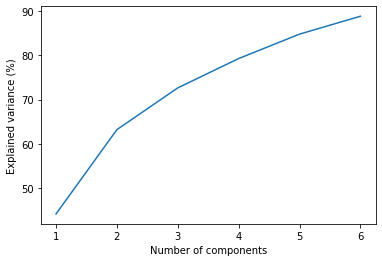

In [153]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
pca.fit(scaled_data)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100));
plt.xlabel("Number of components");
plt.ylabel("Explained variance (%)");

You can also find out the importance of each feature that contributes to each of the components using the components_ attribute of the pca object:

In [154]:
pca_components = abs(pca.components_)
print(pca_components)

[[2.18902444e-01 1.03724578e-01 2.27537293e-01 2.20994985e-01
  1.42589694e-01 2.39285354e-01 2.58400481e-01 2.60853758e-01
  1.38166959e-01 6.43633464e-02 2.05978776e-01 1.74280281e-02
  2.11325916e-01 2.02869635e-01 1.45314521e-02 1.70393451e-01
  1.53589790e-01 1.83417397e-01 4.24984216e-02 1.02568322e-01
  2.27996634e-01 1.04469325e-01 2.36639681e-01 2.24870533e-01
  1.27952561e-01 2.10095880e-01 2.28767533e-01 2.50885971e-01
  1.22904556e-01 1.31783943e-01]
 [2.33857132e-01 5.97060883e-02 2.15181361e-01 2.31076711e-01
  1.86113023e-01 1.51891610e-01 6.01653628e-02 3.47675005e-02
  1.90348770e-01 3.66575471e-01 1.05552152e-01 8.99796818e-02
  8.94572342e-02 1.52292628e-01 2.04430453e-01 2.32715896e-01
  1.97207283e-01 1.30321560e-01 1.83848000e-01 2.80092027e-01
  2.19866379e-01 4.54672983e-02 1.99878428e-01 2.19351858e-01
  1.72304352e-01 1.43593173e-01 9.79641143e-02 8.25723507e-03
  1.41883349e-01 2.75339469e-01]
 [8.53124284e-03 6.45499033e-02 9.31421972e-03 2.86995259e-02
  1.

In [155]:
abs(pca.components_).shape

(6, 30)

In [156]:
index = ['Component'+str(i+1) for i in range(pca.components_.shape[0])]
columns = ['Feature'+str(i+1) for i in range(pca.components_.shape[1])]

df_components = pd.DataFrame(pca_components,index=index, columns=columns)
df_components.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,Feature30
Component1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
Component2,0.233857,0.059706,0.215181,0.231077,0.186113,0.151892,0.060165,0.034768,0.190349,0.366575,...,0.219866,0.045467,0.199878,0.219352,0.172304,0.143593,0.097964,0.008257,0.141883,0.275339
Component3,0.008531,0.064550,0.009314,0.028700,0.104292,0.074092,0.002734,0.025564,0.040240,0.022574,...,0.047507,0.042298,0.048547,0.011902,0.259798,0.236076,0.173057,0.170344,0.271313,0.232791
Component4,0.041409,0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,0.632808,0.013803,0.025895,0.017652,0.091328,0.073951,0.006007,0.036251,0.077053
Component5,0.037786,0.049469,0.037375,0.010331,0.365089,0.011704,0.086375,0.043861,0.305941,0.044424,...,0.004407,0.092883,0.007454,0.027391,0.324435,0.121804,0.188519,0.043332,0.244559,0.094423


For curiosity, let’s print out the top 4 features that contributes the most to each of the 6 components:

In [157]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = np.argsort(pca_components[row])[::-1][:4]  # [::-1] : reverse the list from max to min
    
    # print the top 4 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['mean concave points', 'mean concavity', 'worst concave points', 'mean compactness']
Component 1: ['mean fractal dimension', 'fractal dimension error', 'worst fractal dimension', 'mean radius']
Component 2: ['texture error', 'smoothness error', 'symmetry error', 'worst symmetry']
Component 3: ['worst texture', 'mean texture', 'texture error', 'mean smoothness']
Component 4: ['mean smoothness', 'concavity error', 'worst smoothness', 'mean symmetry']
Component 5: ['worst symmetry', 'symmetry error', 'worst smoothness', 'mean symmetry']


**Transforming all the 30 Columns to the 6 Principal Components**

You can now transform the standardized data of the 30 columns in the dataset to the 6 principal components:

In [158]:
X_pca = pca.transform(scaled_data)
print(X_pca.shape)
print(X_pca)

(569, 6)
[[ 9.19283683  1.94858307 -1.12316616  3.6337309  -1.19511012  1.41142445]
 [ 2.3878018  -3.76817174 -0.52929269  1.11826386  0.62177498  0.02865635]
 [ 5.73389628 -1.0751738  -0.55174759  0.91208267 -0.1770859   0.54145215]
 ...
 [ 1.25617928 -1.90229671  0.56273053 -2.08922702  1.80999133 -0.53444719]
 [10.37479406  1.67201011 -1.87702933 -2.35603113 -0.03374193  0.56793647]
 [-5.4752433  -0.67063679  1.49044308 -2.29915714 -0.18470331  1.61783736]]


## PCA Visualization

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [159]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

Now we can transform this data to its first 2 principal components.

In [160]:
x_pca = pca.transform(scaled_data)

In [161]:
scaled_data.shape

(569, 30)

In [162]:
x_pca.shape

(569, 2)

Great! We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

Text(0, 0.5, 'Second Principal Component')

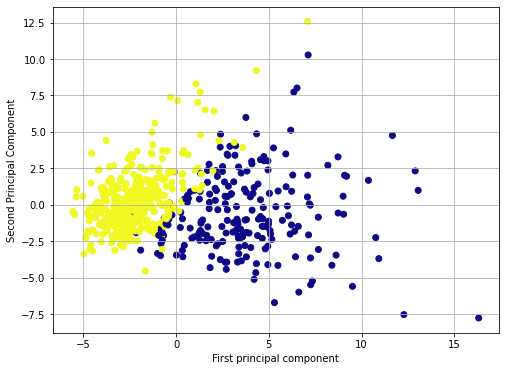

In [163]:
plt.figure(figsize=(8,6))
plt.grid()
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Clearly by using these two components we can easily separate these two classes.

## Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [164]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [165]:
a= pca.components_[0]
np.linalg.norm(a)

0.9999999999999992

In [166]:
# Percentage of variance explained by each of the selected components.
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [167]:
#  The singular values are equal to the 2-norms of the n_components variables in the lower-dimensional space
pca.singular_values_

array([86.93235745, 56.90677266])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [168]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

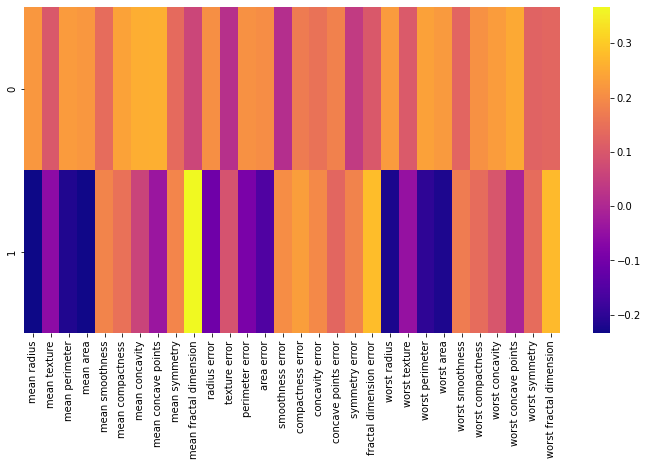

In [169]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)